# Classification: Support Vector Machines, Encoding, and Data Balancing
In this notebook, we will continue our work with classifiers by introducing a new model, three new metrics, a way to encode and decode categorical data, and more ways in which you can handle imbalanced data.

Let's begin with our everyday tasks: Loading the data, cleaning, and generating our train/test split.

For this example, we will use a wine dataset that contains two columns that can be made into categorical data:
- Type, which splits wine into red and white
- Quality, which splits wine into ten different score categories

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In this dataset, there are a few missing values. We will not try to fix them in this notebook, but remember we can use something like data imputation if we do not want to just delete them.

In [47]:
wine = pd.read_csv("winequalityN.csv")
wine.dropna(inplace=True)
wine = wine[wine["quality"]!=9]
wine = wine[wine["quality"]!=3]
wine.reset_index()
wine["type"] = wine["type"].map({"white":0, "red":1})
wine

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,0,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,0,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,0,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,0,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,1,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,1,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6494,1,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,1,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Before we start doing anything else, we should check to see if our categories are balanced! For this notebook, we will only be using the "quality" column.

In [48]:
y = wine["quality"]


In [49]:
X = wine.drop(["quality"], axis=1).drop(["type"], axis=1).drop(["density"],axis=1) #.drop(["citric acid"],axis=1)
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,3.00,0.45,8.8
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,3.30,0.49,9.5
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,3.26,0.44,10.1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,3.19,0.40,9.9
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...
6491,6.8,0.620,0.08,1.9,0.068,28.0,38.0,3.42,0.82,9.5
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,3.45,0.58,10.5
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,3.42,0.75,11.0
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,3.57,0.71,10.2


6

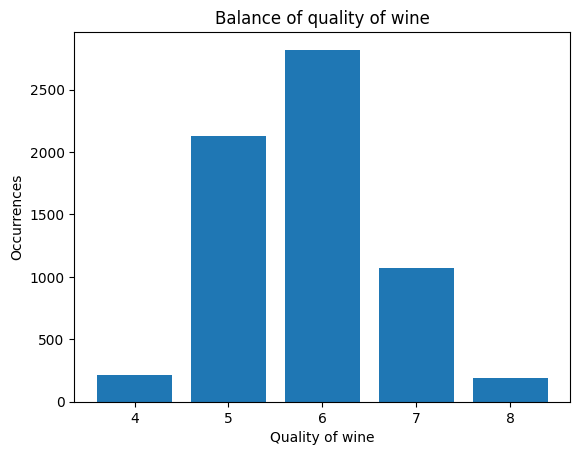

In [50]:

plt.bar(y.value_counts().index, y.value_counts()[:])
plt.xlabel("Quality of wine")
plt.ylabel("Occurrences")
plt.title("Balance of quality of wine")
y.value_counts().index[0]

We'll be using an 80/20 train/test split.

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42, shuffle=True)

In [52]:
y_train.value_counts()

6    2275
5    1717
7     835
4     161
8     154
Name: quality, dtype: int64

In [53]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_under, y_under = rus.fit_resample(X_train, y_train)
X_under

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol
1042,7.3,0.49,0.32,5.20,0.043,18.0,104.0,3.24,0.45,10.7
6161,8.2,0.78,0.00,2.20,0.089,13.0,26.0,3.37,0.46,9.6
1664,8.1,0.28,0.46,15.40,0.059,32.0,177.0,3.27,0.58,9.0
1293,6.9,0.39,0.22,4.30,0.030,10.0,102.0,3.00,0.87,11.6
914,8.0,0.32,0.26,1.20,0.050,11.5,88.0,3.24,0.37,9.5
...,...,...,...,...,...,...,...,...,...,...
4332,7.3,0.19,0.27,13.90,0.057,45.0,155.0,2.94,0.41,8.8
1797,6.9,0.25,0.27,9.05,0.039,37.0,128.0,3.27,0.34,11.3
2774,7.0,0.36,0.32,10.05,0.045,37.0,131.0,3.09,0.33,11.7
4167,6.3,0.17,0.32,1.00,0.040,39.0,118.0,3.31,0.40,13.1


In [54]:
from sklearn import tree

In [55]:
decision_tree = tree.DecisionTreeClassifier(
    criterion = "entropy",
    splitter = "best",
    max_depth = 10,
    max_features = None,
    random_state = 42,
    class_weight = None,
)

In [56]:
decision_tree.fit(X_under, y_under)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)

In [57]:
y_train.unique()

array([6, 5, 7, 4, 8], dtype=int64)

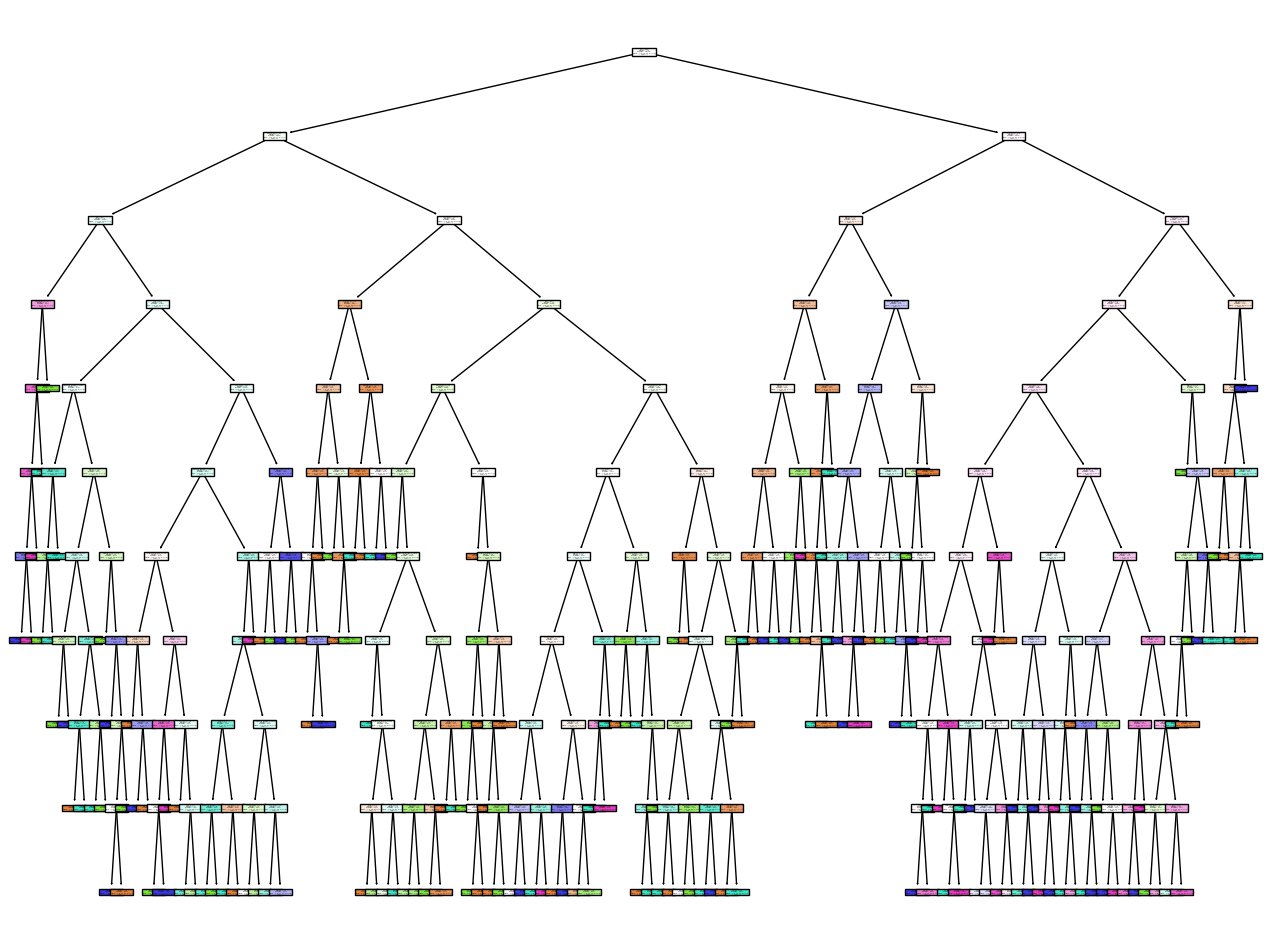

In [58]:
plt.figure(figsize=(16,12))
tree.plot_tree(decision_tree, 
               precision=1, 
               feature_names=['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'], 
               class_names=["4","5","6","7","8"],
               label="all",
               filled=True,
               proportion=True,
              )
plt.show()


In [59]:
labels = X.columns

Text(0.5, 1.0, 'Feature Importance')

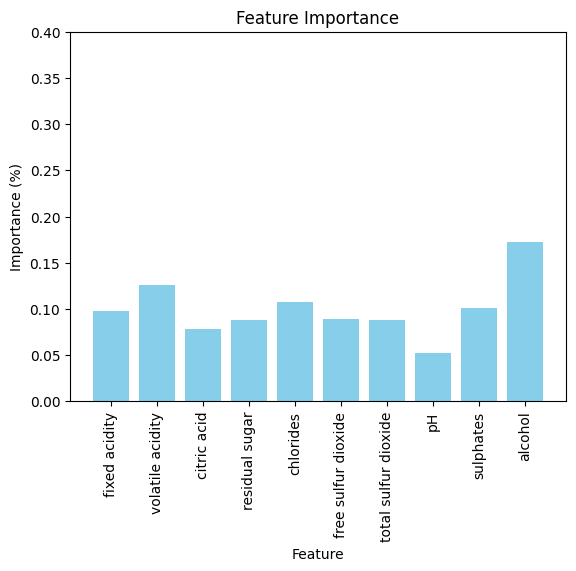

In [60]:
plt.bar(labels,decision_tree.feature_importances_,
        color = "skyblue")
plt.ylim([0,0.4])
plt.xlabel("Feature")
plt.ylabel("Importance (%)")
plt.xticks(range(len(labels)), labels, rotation='vertical')
plt.title("Feature Importance")

In [61]:
decision_tree.score(X_test, y_test)

0.3833592534992224

In [62]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
import seaborn as sns

In [63]:
y_pred = decision_tree.predict(X_test)
decision_tree.classes_ # You can use this to get the labels and the order they were learned in

array([4, 5, 6, 7, 8], dtype=int64)

Text(58.222222222222214, 0.5, 'Labels')

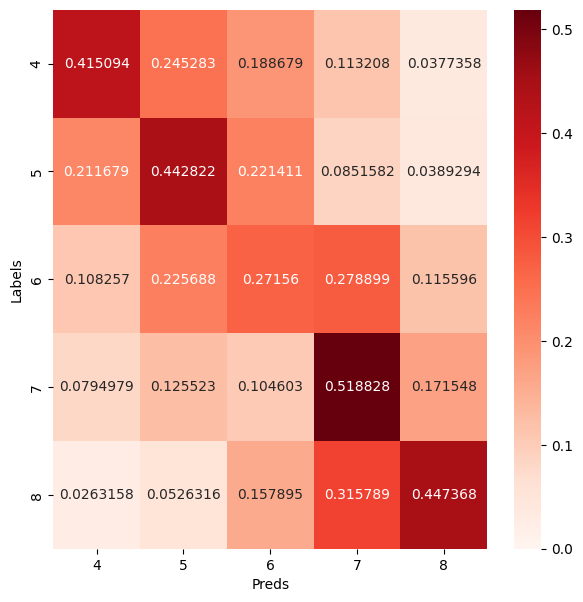

In [64]:
cnfs = confusion_matrix(y_test, y_pred, normalize="true")
plt.figure(figsize=(7,7))
sns.heatmap(cnfs,
            annot=True,
            cmap="Reds",
            vmin=0,
            fmt='g',
           )
plt.xlabel("Preds")
plt.xticks(ticks=[0.5,1.5,2.5,3.5,4.5], labels=decision_tree.classes_)
plt.yticks(ticks=[0.5,1.5,2.5,3.5,4.5], labels=decision_tree.classes_)
plt.ylabel("Labels")

## Metrics: Precison, Recall, and F1 Scores

In [65]:
def get_scores(y_true, y_pred):
    f1 = f1_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    precision = precision_score(y_true, y_pred, average='macro')
    accuracy =  decision_tree.score(X_test, y_test)
    print("The scores for are: ")
    print("------------------")
    print("Accuracy : " , accuracy)
    print("F1 SCORE : ",f1)
    print("RECALL   : ",recall)
    print("PRECISION: ",precision)
    return accuracy,f1, recall, precision

scores = get_scores(y_test, y_pred)

The scores for are: 
------------------
Accuracy :  0.3833592534992224
F1 SCORE :  0.32967772186279376
RECALL   :  0.419134646002773
PRECISION:  0.33295891189783733


In [78]:
table = pd.DataFrame([scores,scores], columns=["Accuracy", "F1 Score", "Recall", "Precision"],index=["Decision Tree","Decision Tree"])

In [79]:
table

,Accuracy,F1 Score,Recall,Precision
Decision Tree,0.383359,0.329678,0.419135,0.332959
Decision Tree,0.383359,0.329678,0.419135,0.332959
